<a href="https://colab.research.google.com/github/arroyoyo1/Analysis-of-a-Supermarket/blob/main/An%C3%A1lisis_de_un_Supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Financial Analysis
This notebook presents a financial analysis of the supermarket, considering the estimated sales needed to cover operating expenses, including payroll, electricity and water. It also adjusts for electricity expenses because the supermarket operates 24 hours a day.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm

df = pd.read_csv("SuperMarketData.csv")
print(df.head())

      Sales  Rating
0  548.9715     9.1
1   80.2200     9.6
2  340.5255     7.4
3  489.0480     8.4
4  634.3785     5.3


## Sales analysis
Sales are first normalized to fit the data to a beta distribution and then the relevant statistics are calculated.

In [9]:
# Conversion from dollars to pesos
sales = np.array(df["Sales"]) * 19.88

# Data normalization
mx_sales = np.max(sales)
mn_sales = np.min(sales)
if (mx_sales != mn_sales):
    sales_norm = 1 / (mx_sales - mn_sales) * (sales - mn_sales)

# Fit a beta distribution model to the sales data
a, b, _, _ = beta.fit(sales)

# Calculate normalized mean and variance
mu_norm = a / (a + b)
var_norm = (a * b) / ((a + b)**2 * (a + b + 1))

# Calculate denormalized mean and variance
mu = (mx_sales - mn_sales) * mu_norm + mn_sales
var = (mx_sales - mn_sales)**2 * var_norm

## Calculation of Operating Expenses
Payroll calculations, electricity costs considering 24-hour operation, and water costs are included.

In [10]:
# Monthly salaries: (daily rate) * number of employees
days = 24
factor = 1.15  # Additional factor for payroll
cashiers = (258.25 * days) * 30
cleaners = (5000) * 20
general_manager = (1e5) * 1
assistant_managers = (45000) * 4
warehouse_staff = (262.13 * days) * 40
aisle_staff = (264.65 * days) * 40
total_payroll = factor * (cashiers + cleaners + warehouse_staff + aisle_staff) + general_manager + assistant_managers

# Other monthly expenses
monthly_electricity = 120 * 2000 * 12 * 2.3 * 30
monthly_water = 169179.28 + 20301.51 + 16917.93 + 33023.79
monthly_waste = 2708.82 * 4

# Minimum income required to cover expenses
income = 15e5 + total_payroll + monthly_electricity + monthly_water + monthly_waste

## Estimating the Number of Sales
Using the statistics calculated above, we estimate how many sales are needed to cover operating expenses and still earn 1.5 million pesos, and calculate the percentage of the population we should retain as customers. Clearly, it wouldn't be feasible since retaining almost half of the population of a community is almost impossible.

In [11]:
# Calculate the number of customers needed to achieve this income with at least 99% confidence
omega = norm.ppf(0.01)  # Z-value for a 99% confidence level
a_ = mu**2
b_ = -2 * mu * income - omega**2 * var
c_ = income**2
N1 = (-b_ + np.sqrt(b_**2 - 4 * a_ * c_)) / (2 * a_)
N2 = (-b_ - np.sqrt(b_**2 - 4 * a_ * c_)) / (2 * a_)
print(f"Results: {N1}, {N2}")

if (income / N1 - mu > 0):
    N = N1
else:
    N = N2

# Calculate the percentage of the population that needs to be convinced
population = 16e4
percentage_population = N / population
print(f"You need to convince {round(percentage_population, 3)}% of the population.")

Results: 36404.859132533806, 35763.38885267042
You need to convince 0.224% of the population.


## Distribution of Ratings
A histogram representing the distribution of supermarket customer ratings is displayed. We can observe that they're uniformly distributed.

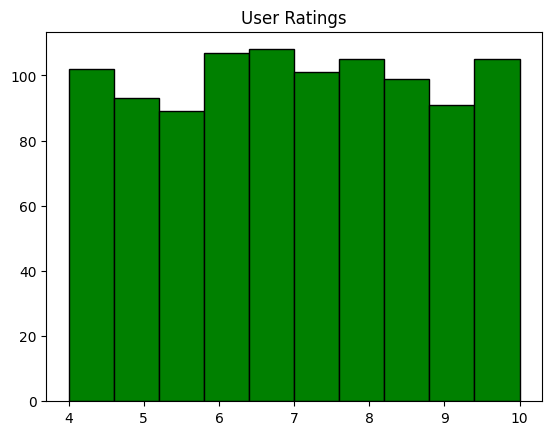

In [12]:
# Histogram of user ratings distribution
plt.hist(df['Rating'], edgecolor="black", color='g')
plt.title('User Ratings')
plt.show()

## Probability of the ratings

We calculate the probability that the ratings are greater than or equal to 8.5 to give a message to the customer service department.

In [13]:
# Data for rating analysis
n = 5  # Sample size
mu = np.average(df['Rating'])  # Population mean
var = np.var(df['Rating'])  # Population variance

# Probability of obtaining an average rating >= 8.5 in a sample of n people
Z = (8.5 - mu) / (np.sqrt(var / n))
prob = 1 - norm.cdf(Z)
print(f"Probability of achieving an average rating >= 8.5: {prob:.2%}")

# Feedback based on the probability
if prob < 0.10:
    print("Urgent improvement of customer service strategies is needed!")
elif 0.10 < prob <= 0.40:
    print("Priority should be given to reviewing the customer service department.")
elif 0.40 < prob <= 0.80:
    print("Minor adjustments can be made to improve the ratings.")
else:
    print("The customer service department is doing an excellent job!")


Probability of achieving an average rating >= 8.5: 2.34%
Urgent improvement of customer service strategies is needed!
